In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(f'/content/drive/MyDrive/Cyber Assignment 2/training_dataset.csv')
df

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,58:50.7,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
1,58:50.3,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
2,58:49.9,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
3,58:49.5,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
4,58:49.1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,18:56.6,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
536134,18:56.2,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
536135,18:55.8,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,0
536136,18:55.4,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,0


In [ ]:
df=df.drop(['timestamp','longest_word','sld'], axis = 1)

In [ ]:
df

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Label
0,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,1
1,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
3,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
4,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0
536134,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0
536135,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1,0
536136,25,8,0,10,9,2.556642,6,6,7,3.333333,12,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        536138 non-null  int64  
 1   subdomain_length  536138 non-null  int64  
 2   upper             536138 non-null  int64  
 3   lower             536138 non-null  int64  
 4   numeric           536138 non-null  int64  
 5   entropy           536138 non-null  float64
 6   special           536138 non-null  int64  
 7   labels            536138 non-null  int64  
 8   labels_max        536138 non-null  int64  
 9   labels_average    536138 non-null  float64
 10  len               536138 non-null  int64  
 11  subdomain         536138 non-null  int64  
 12  Label             536138 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 53.2 MB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)

In [ ]:
y_test.unique()

array([0, 1])

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostClassifier
cat_clf=CatBoostClassifier(iterations= 1500,loss_function= 'Logloss',depth= 4,learning_rate= 0.01,random_seed=42)
cat_clf.fit(X_train,y_train)

0:	learn: 0.6833262	total: 223ms	remaining: 5m 34s
1:	learn: 0.6740256	total: 316ms	remaining: 3m 56s
2:	learn: 0.6650508	total: 458ms	remaining: 3m 48s
3:	learn: 0.6571912	total: 567ms	remaining: 3m 32s
4:	learn: 0.6474151	total: 667ms	remaining: 3m 19s
5:	learn: 0.6393099	total: 798ms	remaining: 3m 18s
6:	learn: 0.6312024	total: 890ms	remaining: 3m 9s
7:	learn: 0.6240805	total: 982ms	remaining: 3m 3s
8:	learn: 0.6170742	total: 1.08s	remaining: 2m 59s
9:	learn: 0.6097414	total: 1.2s	remaining: 2m 59s
10:	learn: 0.6037712	total: 1.29s	remaining: 2m 55s
11:	learn: 0.5971368	total: 1.39s	remaining: 2m 51s
12:	learn: 0.5901683	total: 1.5s	remaining: 2m 51s
13:	learn: 0.5842443	total: 1.58s	remaining: 2m 47s
14:	learn: 0.5783927	total: 1.67s	remaining: 2m 45s
15:	learn: 0.5725629	total: 1.79s	remaining: 2m 45s
16:	learn: 0.5673943	total: 1.86s	remaining: 2m 42s
17:	learn: 0.5623471	total: 1.94s	remaining: 2m 39s
18:	learn: 0.5579539	total: 2.04s	remaining: 2m 39s
19:	learn: 0.5532332	total

In [ ]:
cat_clf_basic=CatBoostClassifier(iterations= 1500)
cat_clf_basic.fit(X_train,y_train)

Learning rate set to 0.089272
0:	learn: 0.6103226	total: 89.2ms	remaining: 2m 13s
1:	learn: 0.5527318	total: 190ms	remaining: 2m 22s
2:	learn: 0.5139773	total: 275ms	remaining: 2m 17s
3:	learn: 0.4882762	total: 365ms	remaining: 2m 16s
4:	learn: 0.4689050	total: 502ms	remaining: 2m 30s
5:	learn: 0.4555219	total: 600ms	remaining: 2m 29s
6:	learn: 0.4476341	total: 701ms	remaining: 2m 29s
7:	learn: 0.4403240	total: 815ms	remaining: 2m 32s
8:	learn: 0.4348800	total: 909ms	remaining: 2m 30s
9:	learn: 0.4302418	total: 1.01s	remaining: 2m 30s
10:	learn: 0.4263395	total: 1.09s	remaining: 2m 28s
11:	learn: 0.4233692	total: 1.19s	remaining: 2m 27s
12:	learn: 0.4210239	total: 1.27s	remaining: 2m 25s
13:	learn: 0.4190663	total: 1.36s	remaining: 2m 24s
14:	learn: 0.4173012	total: 1.45s	remaining: 2m 23s
15:	learn: 0.4162037	total: 1.53s	remaining: 2m 21s
16:	learn: 0.4151151	total: 1.61s	remaining: 2m 20s
17:	learn: 0.4144490	total: 1.7s	remaining: 2m 19s
18:	learn: 0.4139022	total: 1.79s	remaining:

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

def visualize_results(clf,x_test,y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)

    data_log = {'accuracy': accuracy,
                'f1score': f1score,
                'recall': recall,
                'precision': precision,
                }
    print("Classification report:\n", classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)  
    print(data_log)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75     72304
           1       0.76      1.00      0.86     88538

    accuracy                           0.82    160842
   macro avg       0.88      0.80      0.81    160842
weighted avg       0.87      0.82      0.81    160842

{'accuracy': 0.8219370562415289, 'f1score': 0.8607139383328469, 'recall': 0.999457859901963, 'precision': 0.755795083787431}


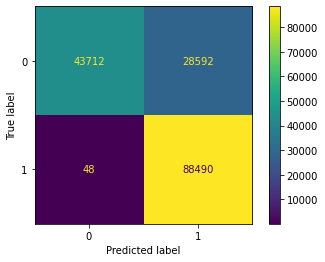

In [ ]:
y_pred=cat_clf_basic.predict(X_test)
visualize_results(cat_clf_basic,X_test,y_test, y_pred)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75     72304
           1       0.76      1.00      0.86     88538

    accuracy                           0.82    160842
   macro avg       0.88      0.80      0.81    160842
weighted avg       0.86      0.82      0.81    160842

{'accuracy': 0.8216945822608522, 'f1score': 0.8604883079482601, 'recall': 0.9989383089746775, 'precision': 0.755744302694204}


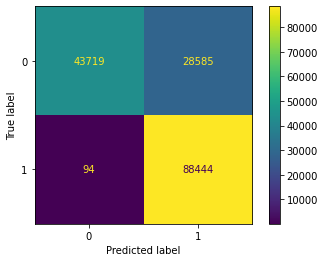

In [ ]:
y_pred=cat_clf.predict(X_test)
visualize_results(cat_clf,X_test,y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=250,
                                 max_depth=26,
                                 criterion="gini",
                                 class_weight="balanced",
                                 bootstrap="true",
                                 random_state=1)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap='true', class_weight='balanced', max_depth=26,
                       n_estimators=250, random_state=1)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75     72304
           1       0.76      1.00      0.86     88538

    accuracy                           0.82    160842
   macro avg       0.88      0.80      0.81    160842
weighted avg       0.87      0.82      0.81    160842

{'accuracy': 0.8220303154648662, 'f1score': 0.8607983971756056, 'recall': 0.9996385732679753, 'precision': 0.7558219967719622}


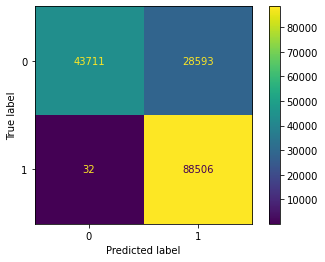

In [ ]:
y_pred=rf_clf.predict(X_test)
visualize_results(rf_clf,X_test,y_test, y_pred)

In [ ]:
rf_clf_basic = RandomForestClassifier(n_estimators=250)
rf_clf_basic.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75     72304
           1       0.76      1.00      0.86     88538

    accuracy                           0.82    160842
   macro avg       0.88      0.80      0.81    160842
weighted avg       0.87      0.82      0.81    160842

{'accuracy': 0.8220303154648662, 'f1score': 0.8607983971756056, 'recall': 0.9996385732679753, 'precision': 0.7558219967719622}


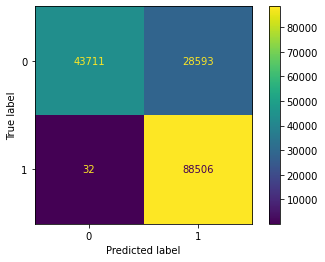

In [ ]:
y_pred=rf_clf_basic.predict(X_test)
visualize_results(rf_clf_basic,X_test,y_test, y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf_basic = LogisticRegression(random_state=42)
lr_clf_basic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.60      0.75     72304
           1       0.76      1.00      0.86     88538

    accuracy                           0.82    160842
   macro avg       0.87      0.80      0.81    160842
weighted avg       0.86      0.82      0.81    160842

{'accuracy': 0.8199537434252248, 'f1score': 0.8589120849674794, 'recall': 0.9955951117034494, 'precision': 0.7552284585792987}


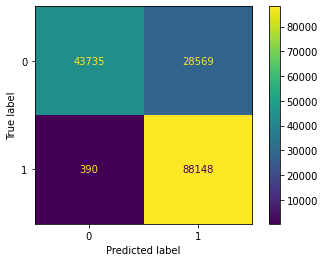

In [ ]:
y_pred=lr_clf_basic.predict(X_test)
visualize_results(lr_clf_basic,X_test,y_test, y_pred)

In [ ]:
lr_clf = LogisticRegression(random_state=42,penalty='l1',solver='liblinear')
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.60      0.75     72304
           1       0.76      1.00      0.86     88538

    accuracy                           0.82    160842
   macro avg       0.87      0.80      0.81    160842
weighted avg       0.86      0.82      0.81    160842

{'accuracy': 0.819978612551448, 'f1score': 0.8589315729214879, 'recall': 0.9956177008742009, 'precision': 0.7552455940437126}


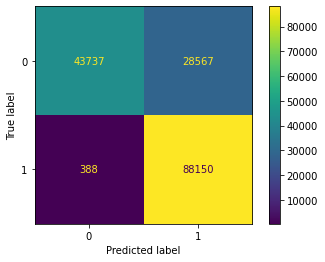

In [ ]:
y_pred=lr_clf.predict(X_test)
visualize_results(lr_clf,X_test,y_test, y_pred)